# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

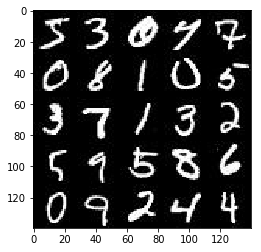

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

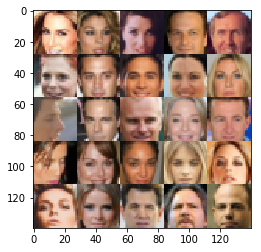

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.5.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests
import tensorflow as tf

# Rank means t
def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    # Learning rate
    learning_rate_raw = 0.003
    
    print(image_width)
    print(image_height)
    print(image_channels)
    print(z_dim)

    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name="input_real")
    input_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, [], name="learning_rate")
    
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

28
28
3
100
Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    # Drop out rate
    drop_rate = 0.1
    # Alpha rate for leaky relu
    alpha = 0.2
    kernel_size = 3
    
    n_units = 128
    size_mult = 64
    x = images    
    
    with tf.variable_scope("discriminator", reuse=reuse):
        
        # Input layer is 28 X 28
        x1 = tf.layers.conv2d(x, size_mult, kernel_size, strides=2, padding='same')
        dropout1 = tf.layers.dropout(x1, rate=drop_rate)
        relu1 = tf.maximum(alpha * dropout1, dropout1)
        
        
        
        # 14 x 14 X 128
        x2 = tf.layers.conv2d(relu1, size_mult * 2, kernel_size, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        dropout2 = tf.layers.dropout(bn2, rate=drop_rate)
        relu2 = tf.maximum(alpha * dropout2, dropout2)
      
        
        
        # 7 x 7 X 256
        x3 = tf.layers.conv2d(relu2, size_mult * 4, kernel_size, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        #dropout3 = tf.layers.dropout(relu3, rate=drop_rate)
        

        # Flattening conv layer  
        features = tf.reshape(relu3, [-1, 4 * 4 * 256])
        
        # Set class_logits to be the inputs to a softmax distribution over the different classes
        class_logits = tf.layers.dense(features, 1, activation=None)
        
        # Sigmoid and not softmax. Sigmoid because only 2 classes.
        out = tf.nn.sigmoid(class_logits)
        print(class_logits)

    return out, class_logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tensor("dense/BiasAdd:0", shape=(?, 1), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 1), dtype=float32)
Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
#     print(z)
    print(out_channel_dim)
#     print(is_train)
    
    reuse = not is_train
    
    n_units = 32
    
    with tf.variable_scope("generator", reuse=reuse):
        alpha = 0.2
        # fully connected layer
        fc = tf.layers.dense(z, 2*2*512, activation=None)
        x1 = tf.reshape(fc, [-1, 2, 2, 512])
        # conv1
        
#         print(x1.shape)
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        # Leaking relu
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides = 2, padding="same")
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        print("X2: {}".format(x2.shape))

        x3 = tf.layers.conv2d_transpose(x2, 128, 5, 2, padding="same")
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding="same")
        print("Logits: {}".format(logits.shape))
        
        out = tf.tanh(logits)

        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

5
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 5)
5
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 5)
Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

4
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 4)
Tensor("discriminator/dense/BiasAdd:0", shape=(?, 1), dtype=float32)
Tensor("discriminator_1/dense/BiasAdd:0", shape=(?, 1), dtype=float32)
Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [14]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    d_train_opt = tf.train.AdamOptimizer(
        learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in ops if opt.name.startswith('generator')]
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(
            learning_rate, beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [15]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [28]:
import time

def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    #saver = tf.train.Saver()
    sample_z = np.random.normal(-1, 1, size=(batch_size, z_dim))

    samples, train_accuracies, test_accuracies = [], [], []
    steps = 0    
    
    print_every = 10
    show_every = 40
    images_to_show = 25
    
    print(data_shape)
    width, height, channels = data_shape[1:]
    print("width: {}, height: {}, channels: {}".format(width, height, channels))
    print("Channel mode: {}".format(data_image_mode))
    # Getting the variables required for training 
    input_real, input_z, some_learning_rate = model_inputs(width, height, channels, z_dim)
    
    # Should use the channel mode to calculate the channels but using the number of channels works too
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    
    # Optimization
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for e in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                #print("Epoch: {}".format(e))
                            
                steps += 1
                
                # Sample random noise for G
                batch_z = np.random.normal(-1, 1, size=(batch_size, z_dim))
                
                # Run the optimizer for discriminator
                _ = sess.run(
                    d_train_opt, 
                    feed_dict={
                        input_real: batch_images, 
                        input_z: batch_z
                    }
                )
                
                # Run the optimizer for the generator
                _ = sess.run(
                    g_train_opt,
                    feed_dict={
                        input_z: batch_z, 
                        input_real: batch_images
                    }
                )
                
                # Print out the losses
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({
                        input_real: batch_images,
                        input_z: batch_z
                    })
                    train_loss_g = g_loss.eval({
                        input_z: batch_z, 
                        input_real: batch_images
                    })
                    print("Epoch {}/{}...".format(e+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                # Show the generator output
                if steps % show_every == 0:
                    show_generator_output(
                        sess,
                        images_to_show,
                        input_z, 
                        channels,
                        data_image_mode
                    )
        saver.save(sess, './checkpoints/generator.ckpt')

    with open('samples.pkl', 'wb') as f:
        pkl.dump(samples, f)
            


### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

(60000, 28, 28, 1)
width: 28, height: 28, channels: 1
Channel mode: L
28
28
1
110
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)
Tensor("discriminator/dense/BiasAdd:0", shape=(?, 1), dtype=float32)
Tensor("discriminator_1/dense/BiasAdd:0", shape=(?, 1), dtype=float32)
Epoch 1/20... Discriminator Loss: 0.1578... Generator Loss: 4.8612
Epoch 1/20... Discriminator Loss: 0.1281... Generator Loss: 2.7005
Epoch 1/20... Discriminator Loss: 0.3966... Generator Loss: 3.9051
Epoch 1/20... Discriminator Loss: 2.2759... Generator Loss: 0.1770
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


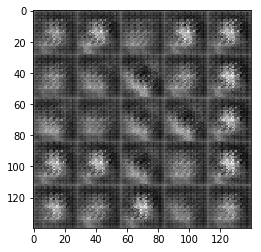

Epoch 1/20... Discriminator Loss: 0.7015... Generator Loss: 1.2578
Epoch 1/20... Discriminator Loss: 1.6334... Generator Loss: 5.0296
Epoch 1/20... Discriminator Loss: 0.1450... Generator Loss: 4.3710
Epoch 1/20... Discriminator Loss: 0.7748... Generator Loss: 5.8145
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


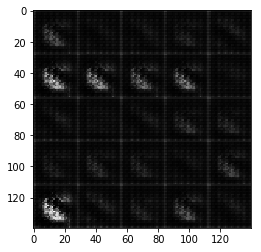

Epoch 1/20... Discriminator Loss: 0.1152... Generator Loss: 4.3125
Epoch 1/20... Discriminator Loss: 0.0937... Generator Loss: 10.0295
Epoch 1/20... Discriminator Loss: 0.1452... Generator Loss: 2.9191
Epoch 1/20... Discriminator Loss: 0.2780... Generator Loss: 1.8008
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


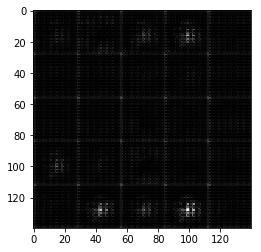

Epoch 1/20... Discriminator Loss: 0.0753... Generator Loss: 3.1056
Epoch 1/20... Discriminator Loss: 0.2258... Generator Loss: 6.6631
Epoch 1/20... Discriminator Loss: 0.1834... Generator Loss: 1.8639
Epoch 1/20... Discriminator Loss: 0.1126... Generator Loss: 3.9383
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


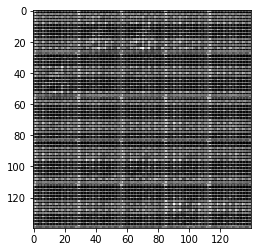

Epoch 1/20... Discriminator Loss: 0.0525... Generator Loss: 3.8512
Epoch 1/20... Discriminator Loss: 0.0272... Generator Loss: 4.4863
Epoch 1/20... Discriminator Loss: 0.1114... Generator Loss: 2.8670
Epoch 1/20... Discriminator Loss: 0.0445... Generator Loss: 3.8578
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


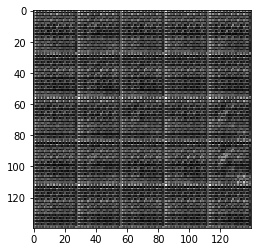

Epoch 1/20... Discriminator Loss: 0.0716... Generator Loss: 6.2963
Epoch 1/20... Discriminator Loss: 0.0370... Generator Loss: 4.1261
Epoch 1/20... Discriminator Loss: 0.0148... Generator Loss: 7.3646
Epoch 2/20... Discriminator Loss: 4.0830... Generator Loss: 9.2423
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


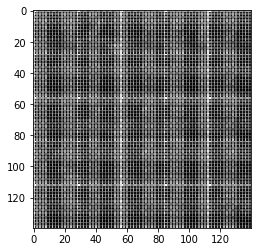

Epoch 2/20... Discriminator Loss: 2.6880... Generator Loss: 8.7888
Epoch 2/20... Discriminator Loss: 0.1455... Generator Loss: 2.0396
Epoch 2/20... Discriminator Loss: 0.1404... Generator Loss: 2.8356
Epoch 2/20... Discriminator Loss: 0.1166... Generator Loss: 2.5740
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


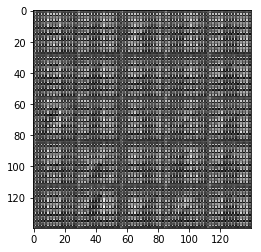

Epoch 2/20... Discriminator Loss: 0.1607... Generator Loss: 4.1217
Epoch 2/20... Discriminator Loss: 0.9334... Generator Loss: 4.9225
Epoch 2/20... Discriminator Loss: 0.0973... Generator Loss: 5.8176
Epoch 2/20... Discriminator Loss: 0.1437... Generator Loss: 3.9421
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


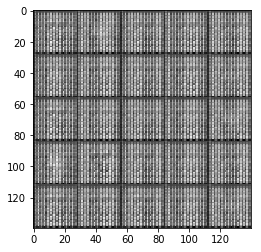

Epoch 2/20... Discriminator Loss: 0.1575... Generator Loss: 3.4671
Epoch 2/20... Discriminator Loss: 0.8072... Generator Loss: 0.6510
Epoch 2/20... Discriminator Loss: 0.2794... Generator Loss: 3.4805
Epoch 2/20... Discriminator Loss: 0.8354... Generator Loss: 0.7273
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


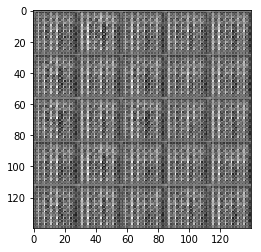

Epoch 2/20... Discriminator Loss: 0.6238... Generator Loss: 11.6069
Epoch 2/20... Discriminator Loss: 0.0916... Generator Loss: 5.1470
Epoch 2/20... Discriminator Loss: 0.0553... Generator Loss: 4.7848
Epoch 2/20... Discriminator Loss: 3.0722... Generator Loss: 0.0490
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


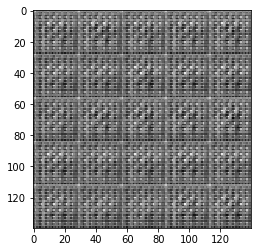

Epoch 2/20... Discriminator Loss: 0.3901... Generator Loss: 1.4177
Epoch 2/20... Discriminator Loss: 0.5268... Generator Loss: 1.4415
Epoch 2/20... Discriminator Loss: 0.4020... Generator Loss: 1.4327
Epoch 2/20... Discriminator Loss: 0.6779... Generator Loss: 7.1741
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


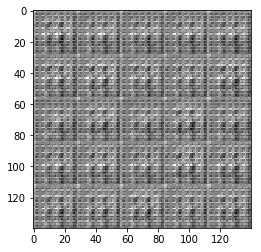

Epoch 2/20... Discriminator Loss: 0.4176... Generator Loss: 7.4684
Epoch 2/20... Discriminator Loss: 0.4240... Generator Loss: 5.1900
Epoch 3/20... Discriminator Loss: 0.1510... Generator Loss: 3.2876
Epoch 3/20... Discriminator Loss: 0.0729... Generator Loss: 7.0146
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


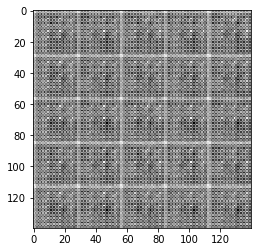

Epoch 3/20... Discriminator Loss: 0.1792... Generator Loss: 4.6265
Epoch 3/20... Discriminator Loss: 0.2912... Generator Loss: 3.2572
Epoch 3/20... Discriminator Loss: 1.5305... Generator Loss: 10.2502
Epoch 3/20... Discriminator Loss: 3.2788... Generator Loss: 0.0460
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


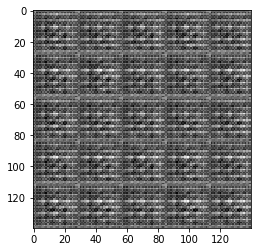

Epoch 3/20... Discriminator Loss: 0.7411... Generator Loss: 9.2710
Epoch 3/20... Discriminator Loss: 1.7736... Generator Loss: 0.1964
Epoch 3/20... Discriminator Loss: 0.5304... Generator Loss: 8.9587
Epoch 3/20... Discriminator Loss: 0.2045... Generator Loss: 3.2791
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


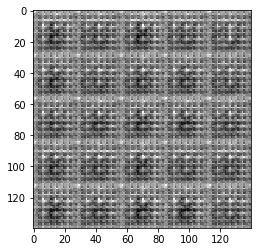

Epoch 3/20... Discriminator Loss: 0.0915... Generator Loss: 3.0873
Epoch 3/20... Discriminator Loss: 0.2974... Generator Loss: 4.5945
Epoch 3/20... Discriminator Loss: 0.2383... Generator Loss: 2.4112
Epoch 3/20... Discriminator Loss: 0.2409... Generator Loss: 2.0543
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


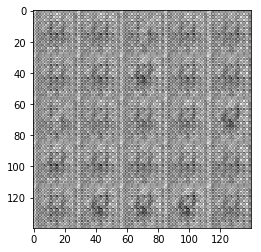

Epoch 3/20... Discriminator Loss: 0.3135... Generator Loss: 1.5184
Epoch 3/20... Discriminator Loss: 0.0580... Generator Loss: 3.9660
Epoch 3/20... Discriminator Loss: 0.4020... Generator Loss: 1.3688
Epoch 3/20... Discriminator Loss: 0.1519... Generator Loss: 2.6834
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


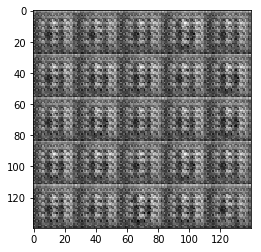

Epoch 3/20... Discriminator Loss: 0.2566... Generator Loss: 2.5572
Epoch 3/20... Discriminator Loss: 0.2379... Generator Loss: 2.0133
Epoch 3/20... Discriminator Loss: 0.2041... Generator Loss: 1.7893
Epoch 3/20... Discriminator Loss: 0.0703... Generator Loss: 3.0932
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


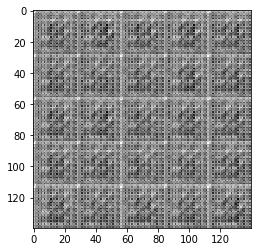

Epoch 3/20... Discriminator Loss: 0.0507... Generator Loss: 4.7853
Epoch 3/20... Discriminator Loss: 0.1144... Generator Loss: 3.1153
Epoch 4/20... Discriminator Loss: 0.0666... Generator Loss: 3.7331
Epoch 4/20... Discriminator Loss: 0.1103... Generator Loss: 2.7126
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


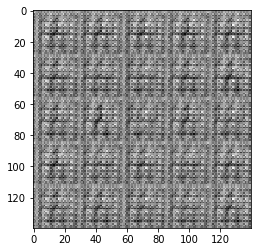

Epoch 4/20... Discriminator Loss: 0.0795... Generator Loss: 2.9446
Epoch 4/20... Discriminator Loss: 0.1289... Generator Loss: 4.5040
Epoch 4/20... Discriminator Loss: 0.1905... Generator Loss: 2.2305
Epoch 4/20... Discriminator Loss: 0.0191... Generator Loss: 6.2774
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


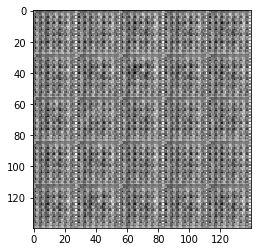

Epoch 4/20... Discriminator Loss: 0.2483... Generator Loss: 1.7379
Epoch 4/20... Discriminator Loss: 0.1452... Generator Loss: 2.5282
Epoch 4/20... Discriminator Loss: 0.3497... Generator Loss: 4.7317
Epoch 4/20... Discriminator Loss: 0.1056... Generator Loss: 9.2586
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


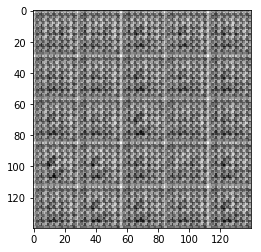

Epoch 4/20... Discriminator Loss: 0.1193... Generator Loss: 8.5938
Epoch 4/20... Discriminator Loss: 0.2132... Generator Loss: 1.8184
Epoch 4/20... Discriminator Loss: 0.1191... Generator Loss: 5.7041
Epoch 4/20... Discriminator Loss: 0.0358... Generator Loss: 3.7632
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


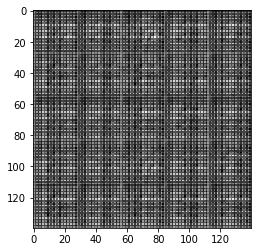

Epoch 4/20... Discriminator Loss: 0.1551... Generator Loss: 7.7630
Epoch 4/20... Discriminator Loss: 0.0920... Generator Loss: 2.5018
Epoch 4/20... Discriminator Loss: 0.0307... Generator Loss: 4.3022
Epoch 4/20... Discriminator Loss: 0.4239... Generator Loss: 1.3737
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


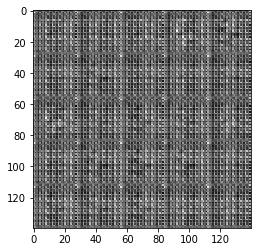

Epoch 4/20... Discriminator Loss: 0.5445... Generator Loss: 0.8856
Epoch 4/20... Discriminator Loss: 0.2435... Generator Loss: 5.6212
Epoch 4/20... Discriminator Loss: 0.0973... Generator Loss: 3.0939
Epoch 4/20... Discriminator Loss: 0.1986... Generator Loss: 2.2518
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


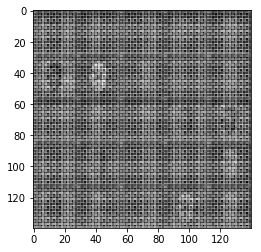

Epoch 4/20... Discriminator Loss: 0.0764... Generator Loss: 3.4936
Epoch 5/20... Discriminator Loss: 0.0446... Generator Loss: 3.8986
Epoch 5/20... Discriminator Loss: 0.1149... Generator Loss: 3.9750
Epoch 5/20... Discriminator Loss: 0.0926... Generator Loss: 2.7876
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


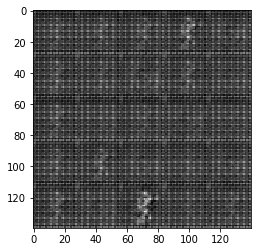

Epoch 5/20... Discriminator Loss: 0.0936... Generator Loss: 3.9677
Epoch 5/20... Discriminator Loss: 0.4849... Generator Loss: 8.5660
Epoch 5/20... Discriminator Loss: 0.0542... Generator Loss: 4.8022
Epoch 5/20... Discriminator Loss: 0.1215... Generator Loss: 2.4948
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


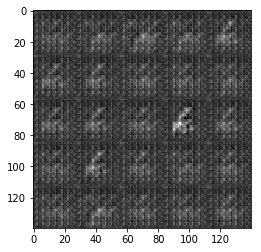

Epoch 5/20... Discriminator Loss: 0.0538... Generator Loss: 6.7585
Epoch 5/20... Discriminator Loss: 0.1205... Generator Loss: 3.5833
Epoch 5/20... Discriminator Loss: 0.0641... Generator Loss: 2.9269
Epoch 5/20... Discriminator Loss: 0.0251... Generator Loss: 6.7751
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


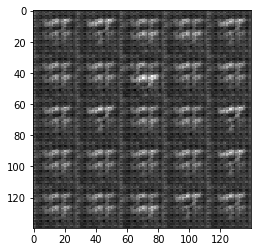

Epoch 5/20... Discriminator Loss: 3.4388... Generator Loss: 17.4580
Epoch 5/20... Discriminator Loss: 0.1938... Generator Loss: 10.1953
Epoch 5/20... Discriminator Loss: 0.3215... Generator Loss: 15.7897
Epoch 5/20... Discriminator Loss: 0.0202... Generator Loss: 6.1201
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


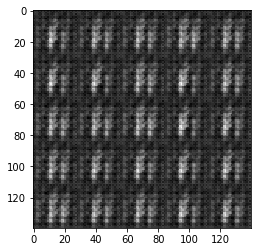

Epoch 5/20... Discriminator Loss: 0.1909... Generator Loss: 1.8074
Epoch 5/20... Discriminator Loss: 0.0235... Generator Loss: 6.1618
Epoch 5/20... Discriminator Loss: 0.3752... Generator Loss: 1.2117
Epoch 5/20... Discriminator Loss: 0.3834... Generator Loss: 12.6003
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


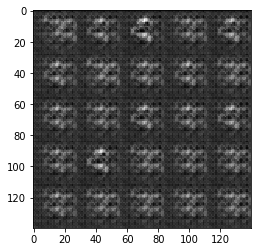

Epoch 5/20... Discriminator Loss: 0.1124... Generator Loss: 3.8458
Epoch 5/20... Discriminator Loss: 0.1194... Generator Loss: 2.9580
Epoch 5/20... Discriminator Loss: 0.1313... Generator Loss: 2.6929
Epoch 5/20... Discriminator Loss: 0.0888... Generator Loss: 3.0387
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


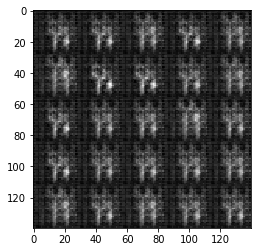

Epoch 5/20... Discriminator Loss: 0.0671... Generator Loss: 4.1886
Epoch 6/20... Discriminator Loss: 0.1240... Generator Loss: 4.7332
Epoch 6/20... Discriminator Loss: 0.2306... Generator Loss: 1.8197
Epoch 6/20... Discriminator Loss: 0.1080... Generator Loss: 7.5408
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


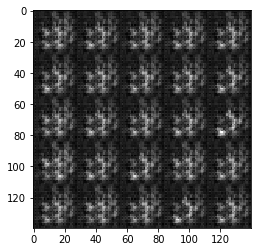

Epoch 6/20... Discriminator Loss: 0.1142... Generator Loss: 2.6505
Epoch 6/20... Discriminator Loss: 0.0514... Generator Loss: 3.8297
Epoch 6/20... Discriminator Loss: 0.1493... Generator Loss: 2.5339
Epoch 6/20... Discriminator Loss: 0.0822... Generator Loss: 3.3720
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


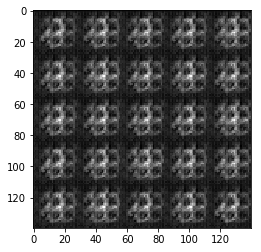

Epoch 6/20... Discriminator Loss: 0.1220... Generator Loss: 2.7787
Epoch 6/20... Discriminator Loss: 0.0589... Generator Loss: 4.7013
Epoch 6/20... Discriminator Loss: 0.0290... Generator Loss: 7.1628
Epoch 6/20... Discriminator Loss: 0.1856... Generator Loss: 7.4154
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


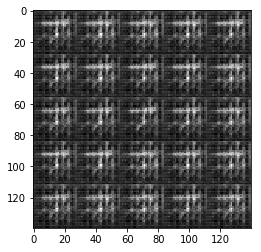

Epoch 6/20... Discriminator Loss: 0.0343... Generator Loss: 5.7419
Epoch 6/20... Discriminator Loss: 0.1459... Generator Loss: 2.4634
Epoch 6/20... Discriminator Loss: 0.1090... Generator Loss: 2.9044
Epoch 6/20... Discriminator Loss: 0.0543... Generator Loss: 3.8677
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


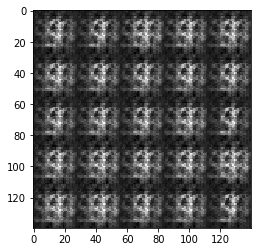

Epoch 6/20... Discriminator Loss: 0.0806... Generator Loss: 2.7636
Epoch 6/20... Discriminator Loss: 0.0316... Generator Loss: 4.8615
Epoch 6/20... Discriminator Loss: 0.0339... Generator Loss: 3.8224
Epoch 6/20... Discriminator Loss: 0.0934... Generator Loss: 3.6520
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


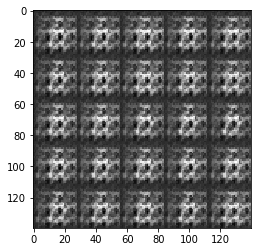

Epoch 6/20... Discriminator Loss: 0.0887... Generator Loss: 5.1073
Epoch 6/20... Discriminator Loss: 0.1210... Generator Loss: 4.9144
Epoch 6/20... Discriminator Loss: 0.2896... Generator Loss: 1.5089
Epoch 6/20... Discriminator Loss: 0.0993... Generator Loss: 3.0975
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


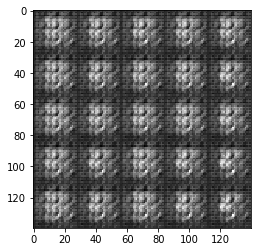

Epoch 7/20... Discriminator Loss: 0.0806... Generator Loss: 3.3233
Epoch 7/20... Discriminator Loss: 0.1003... Generator Loss: 3.6389
Epoch 7/20... Discriminator Loss: 0.1067... Generator Loss: 3.1683
Epoch 7/20... Discriminator Loss: 0.0811... Generator Loss: 3.4486
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


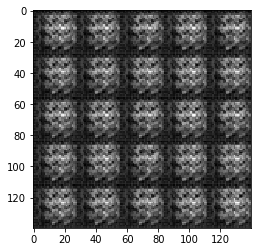

Epoch 7/20... Discriminator Loss: 0.0336... Generator Loss: 5.5295
Epoch 7/20... Discriminator Loss: 0.1032... Generator Loss: 2.7374
Epoch 7/20... Discriminator Loss: 0.0441... Generator Loss: 3.8568
Epoch 7/20... Discriminator Loss: 0.0500... Generator Loss: 4.0478
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


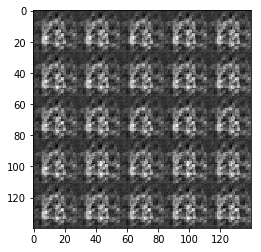

Epoch 7/20... Discriminator Loss: 0.0590... Generator Loss: 3.9669
Epoch 7/20... Discriminator Loss: 0.0723... Generator Loss: 5.8545
Epoch 7/20... Discriminator Loss: 0.0215... Generator Loss: 3.9538
Epoch 7/20... Discriminator Loss: 0.0472... Generator Loss: 3.5212
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


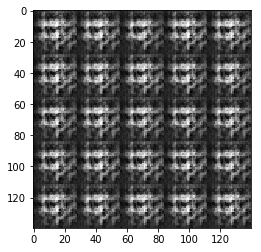

Epoch 7/20... Discriminator Loss: 0.0277... Generator Loss: 3.8059
Epoch 7/20... Discriminator Loss: 0.0421... Generator Loss: 6.6351
Epoch 7/20... Discriminator Loss: 0.0701... Generator Loss: 2.7567
Epoch 7/20... Discriminator Loss: 0.1014... Generator Loss: 2.4191
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


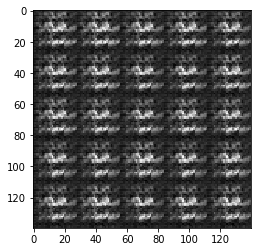

Epoch 7/20... Discriminator Loss: 0.0163... Generator Loss: 5.2317
Epoch 7/20... Discriminator Loss: 0.0387... Generator Loss: 4.4850
Epoch 7/20... Discriminator Loss: 0.0439... Generator Loss: 4.5215
Epoch 7/20... Discriminator Loss: 0.0270... Generator Loss: 4.5410
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


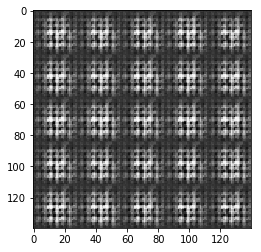

Epoch 7/20... Discriminator Loss: 0.0526... Generator Loss: 3.7735
Epoch 7/20... Discriminator Loss: 0.0910... Generator Loss: 3.2716
Epoch 7/20... Discriminator Loss: 0.0469... Generator Loss: 4.0618
Epoch 8/20... Discriminator Loss: 0.0372... Generator Loss: 3.7688
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


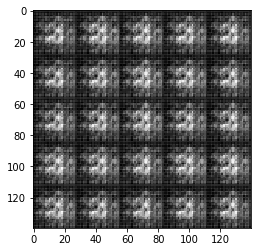

Epoch 8/20... Discriminator Loss: 0.0417... Generator Loss: 3.6352
Epoch 8/20... Discriminator Loss: 0.1017... Generator Loss: 3.1105
Epoch 8/20... Discriminator Loss: 0.0732... Generator Loss: 3.5112
Epoch 8/20... Discriminator Loss: 0.0267... Generator Loss: 9.7477
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


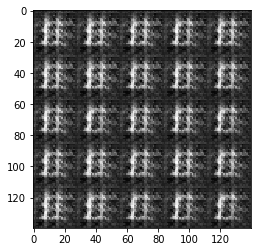

Epoch 8/20... Discriminator Loss: 0.0275... Generator Loss: 4.5797
Epoch 8/20... Discriminator Loss: 0.0530... Generator Loss: 3.4602
Epoch 8/20... Discriminator Loss: 0.0737... Generator Loss: 3.5441
Epoch 8/20... Discriminator Loss: 0.0760... Generator Loss: 3.4230
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


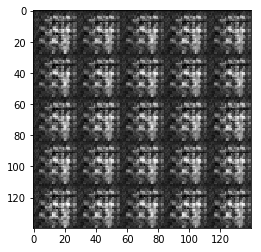

Epoch 8/20... Discriminator Loss: 0.0456... Generator Loss: 4.2203
Epoch 8/20... Discriminator Loss: 0.0636... Generator Loss: 3.5958
Epoch 8/20... Discriminator Loss: 0.0413... Generator Loss: 3.8984
Epoch 8/20... Discriminator Loss: 0.0673... Generator Loss: 9.7967
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


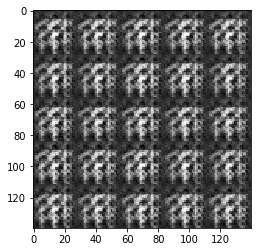

Epoch 8/20... Discriminator Loss: 0.0557... Generator Loss: 4.7058
Epoch 8/20... Discriminator Loss: 0.1029... Generator Loss: 2.8097
Epoch 8/20... Discriminator Loss: 0.0475... Generator Loss: 4.0394
Epoch 8/20... Discriminator Loss: 0.0691... Generator Loss: 2.8800
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


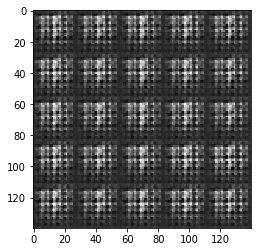

Epoch 8/20... Discriminator Loss: 0.1137... Generator Loss: 3.3342
Epoch 8/20... Discriminator Loss: 0.2056... Generator Loss: 2.0929
Epoch 8/20... Discriminator Loss: 0.1400... Generator Loss: 2.6904
Epoch 8/20... Discriminator Loss: 0.1487... Generator Loss: 2.9529
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


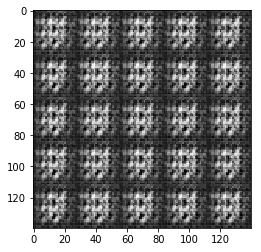

Epoch 8/20... Discriminator Loss: 0.1005... Generator Loss: 3.0962
Epoch 8/20... Discriminator Loss: 0.1372... Generator Loss: 2.9274
Epoch 8/20... Discriminator Loss: 0.0904... Generator Loss: 2.9701
Epoch 9/20... Discriminator Loss: 0.0659... Generator Loss: 3.7712
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


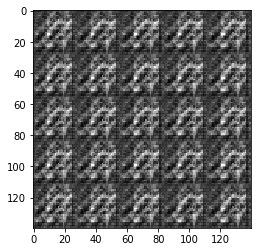

Epoch 9/20... Discriminator Loss: 0.0076... Generator Loss: 15.3882
Epoch 9/20... Discriminator Loss: 0.1534... Generator Loss: 2.8738
Epoch 9/20... Discriminator Loss: 0.3014... Generator Loss: 2.0772
Epoch 9/20... Discriminator Loss: 0.2524... Generator Loss: 1.6020
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


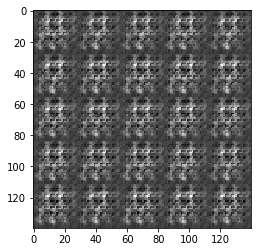

Epoch 9/20... Discriminator Loss: 0.1230... Generator Loss: 2.5078
Epoch 9/20... Discriminator Loss: 0.0841... Generator Loss: 3.5345
Epoch 9/20... Discriminator Loss: 0.2011... Generator Loss: 1.9604
Epoch 9/20... Discriminator Loss: 0.0487... Generator Loss: 4.1633
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


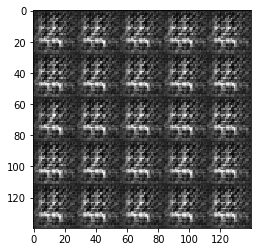

Epoch 9/20... Discriminator Loss: 0.0728... Generator Loss: 3.4145
Epoch 9/20... Discriminator Loss: 0.1254... Generator Loss: 2.6475
Epoch 9/20... Discriminator Loss: 0.0873... Generator Loss: 2.8354
Epoch 9/20... Discriminator Loss: 0.0841... Generator Loss: 3.3620
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


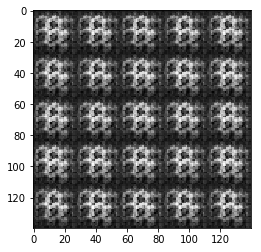

Epoch 9/20... Discriminator Loss: 0.0362... Generator Loss: 4.2114
Epoch 9/20... Discriminator Loss: 0.0323... Generator Loss: 3.9404
Epoch 9/20... Discriminator Loss: 0.0236... Generator Loss: 4.1418
Epoch 9/20... Discriminator Loss: 0.0180... Generator Loss: 4.8972
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


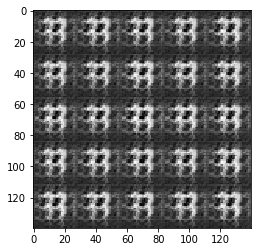

Epoch 9/20... Discriminator Loss: 0.0177... Generator Loss: 4.5404
Epoch 9/20... Discriminator Loss: 0.0259... Generator Loss: 4.5980
Epoch 9/20... Discriminator Loss: 0.0588... Generator Loss: 2.8673
Epoch 9/20... Discriminator Loss: 0.2894... Generator Loss: 1.6251
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


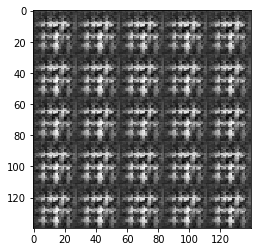

Epoch 9/20... Discriminator Loss: 0.0680... Generator Loss: 8.1477
Epoch 9/20... Discriminator Loss: 0.2226... Generator Loss: 1.7668
Epoch 10/20... Discriminator Loss: 0.0441... Generator Loss: 3.9169
Epoch 10/20... Discriminator Loss: 0.1605... Generator Loss: 2.2868
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


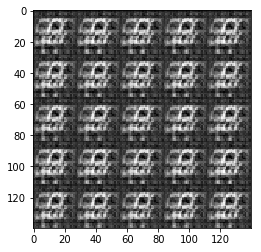

Epoch 10/20... Discriminator Loss: 0.0341... Generator Loss: 12.1930
Epoch 10/20... Discriminator Loss: 0.0959... Generator Loss: 11.6375
Epoch 10/20... Discriminator Loss: 0.0896... Generator Loss: 2.7140
Epoch 10/20... Discriminator Loss: 0.1078... Generator Loss: 2.4709
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


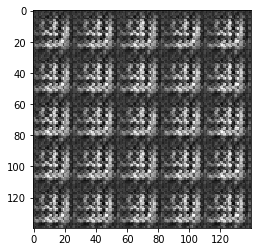

Epoch 10/20... Discriminator Loss: 0.0616... Generator Loss: 3.5653
Epoch 10/20... Discriminator Loss: 0.0210... Generator Loss: 5.4593
Epoch 10/20... Discriminator Loss: 0.0423... Generator Loss: 5.0627
Epoch 10/20... Discriminator Loss: 0.0368... Generator Loss: 4.3018
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


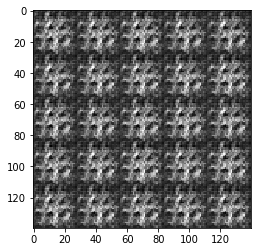

Epoch 10/20... Discriminator Loss: 0.0191... Generator Loss: 4.8745
Epoch 10/20... Discriminator Loss: 0.0252... Generator Loss: 6.1917
Epoch 10/20... Discriminator Loss: 0.0187... Generator Loss: 4.7732
Epoch 10/20... Discriminator Loss: 0.0507... Generator Loss: 3.2948
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


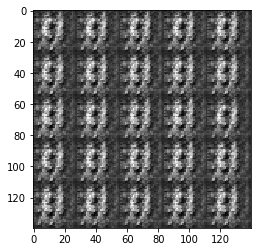

Epoch 10/20... Discriminator Loss: 0.0433... Generator Loss: 4.0332
Epoch 10/20... Discriminator Loss: 0.0167... Generator Loss: 5.0435
Epoch 10/20... Discriminator Loss: 0.0293... Generator Loss: 4.0153
Epoch 10/20... Discriminator Loss: 0.0164... Generator Loss: 8.7926
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


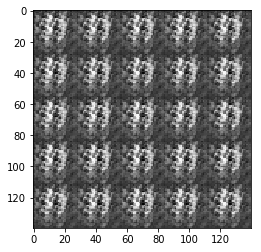

Epoch 10/20... Discriminator Loss: 0.0252... Generator Loss: 4.6524
Epoch 10/20... Discriminator Loss: 0.0028... Generator Loss: 5.9787
Epoch 10/20... Discriminator Loss: 0.0310... Generator Loss: 3.8713
Epoch 10/20... Discriminator Loss: 0.0735... Generator Loss: 3.4351
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


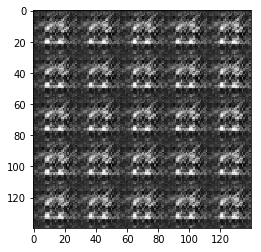

Epoch 10/20... Discriminator Loss: 0.0396... Generator Loss: 3.5014
Epoch 10/20... Discriminator Loss: 0.0313... Generator Loss: 5.4964
Epoch 11/20... Discriminator Loss: 0.0246... Generator Loss: 5.2850
Epoch 11/20... Discriminator Loss: 0.0208... Generator Loss: 4.6468
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


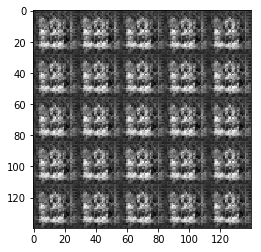

Epoch 11/20... Discriminator Loss: 0.0599... Generator Loss: 3.4890
Epoch 11/20... Discriminator Loss: 0.0300... Generator Loss: 4.0767
Epoch 11/20... Discriminator Loss: 0.0385... Generator Loss: 3.6349
Epoch 11/20... Discriminator Loss: 0.0465... Generator Loss: 3.6956
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


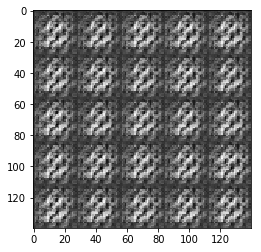

Epoch 11/20... Discriminator Loss: 0.0303... Generator Loss: 4.6331
Epoch 11/20... Discriminator Loss: 0.0275... Generator Loss: 4.9624
Epoch 11/20... Discriminator Loss: 0.0155... Generator Loss: 4.9535
Epoch 11/20... Discriminator Loss: 0.0130... Generator Loss: 4.7720
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


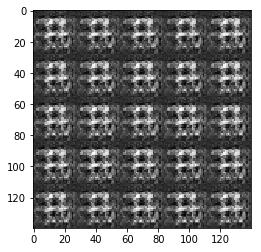

Epoch 11/20... Discriminator Loss: 0.0193... Generator Loss: 5.3743
Epoch 11/20... Discriminator Loss: 0.0167... Generator Loss: 5.1102
Epoch 11/20... Discriminator Loss: 0.0211... Generator Loss: 5.7547
Epoch 11/20... Discriminator Loss: 0.0307... Generator Loss: 4.4921
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


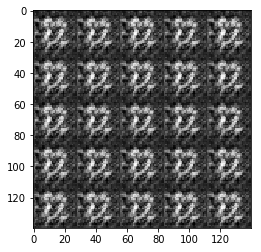

Epoch 11/20... Discriminator Loss: 0.0383... Generator Loss: 3.5417
Epoch 11/20... Discriminator Loss: 0.0325... Generator Loss: 4.1049
Epoch 11/20... Discriminator Loss: 0.0183... Generator Loss: 6.9734
Epoch 11/20... Discriminator Loss: 0.1024... Generator Loss: 2.5655
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


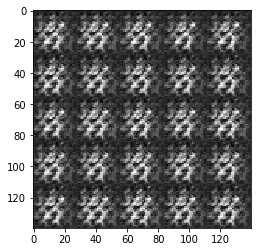

Epoch 11/20... Discriminator Loss: 0.0076... Generator Loss: 5.4392
Epoch 11/20... Discriminator Loss: 0.0184... Generator Loss: 4.8216
Epoch 11/20... Discriminator Loss: 0.0173... Generator Loss: 4.5954
Epoch 11/20... Discriminator Loss: 0.0073... Generator Loss: 6.0098
1
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 1)


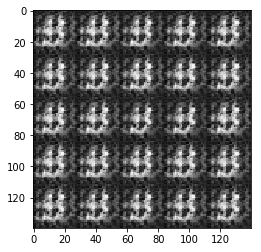

Epoch 11/20... Discriminator Loss: 0.0069... Generator Loss: 5.4614
Epoch 12/20... Discriminator Loss: 0.0053... Generator Loss: 5.8449


KeyboardInterrupt: 

In [30]:
batch_size = 256
z_dim = 110
learning_rate = 0.0008
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 20

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

28
28
3
110
3
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 3)
Tensor("discriminator/dense/BiasAdd:0", shape=(?, 1), dtype=float32)
Tensor("discriminator_1/dense/BiasAdd:0", shape=(?, 1), dtype=float32)
Epoch 1/3... Discriminator Loss: 5.9416... Generator Loss: 0.2246
Epoch 1/3... Discriminator Loss: 3.0106... Generator Loss: 12.8374
Epoch 1/3... Discriminator Loss: 2.7000... Generator Loss: 0.8288
Epoch 1/3... Discriminator Loss: 2.2913... Generator Loss: 6.2536
3
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 3)


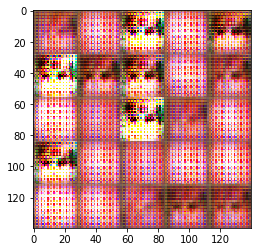

Epoch 1/3... Discriminator Loss: 0.5837... Generator Loss: 2.4068
Epoch 1/3... Discriminator Loss: 0.4743... Generator Loss: 1.8165
Epoch 1/3... Discriminator Loss: 0.5707... Generator Loss: 1.0498
Epoch 1/3... Discriminator Loss: 0.7749... Generator Loss: 2.4167
3
X2: (?, 7, 7, 256)
Logits: (?, 28, 28, 3)


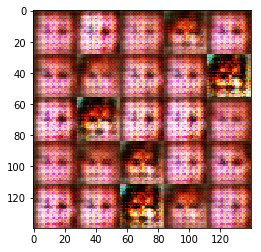

Epoch 1/3... Discriminator Loss: 0.6948... Generator Loss: 2.0163
Epoch 1/3... Discriminator Loss: 1.1469... Generator Loss: 2.5665


KeyboardInterrupt: 

In [20]:
batch_size = 256
z_dim = 110
learning_rate = 0.004
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 3

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.